# Gradient Descent (경사하강법)

- 컴퓨터에서 $x^2$의 최적값을 찾기 위한 방법

> $f(x) = x^2$, $\frac{dy}{dx} = 2x$ <br>
> $x_{new} = x_{old} - \alpha \times (2x_{old})$

- 여기서 $\alpha$ 를 `learning rate`라고 함
- 이와 같이 시작점으로부터 learning rate $\times$ 경사 만큼 하강시켜서 최적값을 찾는 알고리즘

- 코드로 구현
    - 여기에서 iteration과 learning rate는 parameter로, 직접 지정해 주어야 함

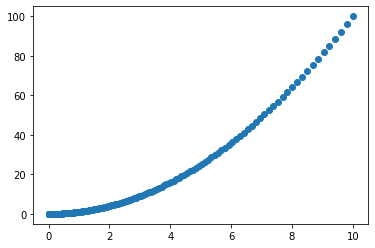

In [2]:
import matplotlib.pyplot as plt
x = 10
derivative = []
X = []
y =[]

for i in range(1000):
    old_value = x
    X.append(old_value)
    y.append(old_value ** 2)
    derivative.append(old_value - 0.01 * 2 * old_value)
    x = old_value - 0.01 * 2 * old_value

plt.scatter(X, y)
plt.show()

## 정해야 하는 것
1. Learning rate에 대한 선정
    - 너무 작을 경우 : 최적값까지 못할 수 있음
    - 너무 클 경우 : 데이터가 튀는 문제가 생김
2. 얼마나 많은 loop을 돌 것인가?
    - 너무 작을 경우 : 시간이 오래 걸림
    - 너무 클 경우 : 수렴하지 못하는 경우가 생김

## 굴곡이 많은 함수의 경우

> $\frac{df(x)}{dx} = sin(x^2) + 2x^2cos(x^2)$ <br>
> $x := x - \alpha \times (sin(x^2) + 2x^2cos(x^2))$

- 이렇게 복잡한 그래프의 경우에는 시작점에 따라 구하는 최적값이 달라져 최적값을 찾지 못할 확률이 큼
- 그렇기 때문에 SGD(Stochastic Gradient Descent)나 다른 방법을 통해 찾는 것이 바람직함

---

# Linear Regression with GD

- Gradient Descent 알고리즘을 Cost function $J(w_0, w_1)$를 최소화하는 데 적용해보자.

> $J(w_0, w_1) = {1\over2m}\displaystyle\sum_{i=1}^{m}{(w_1x^{(i)} + w_0 - y^{(i)})^2}$ <br>
> $Minimize$ $J(w_0, w_1)$

- Visualization

In [4]:
import matplotlib.pyplot as plt
import numpy as np

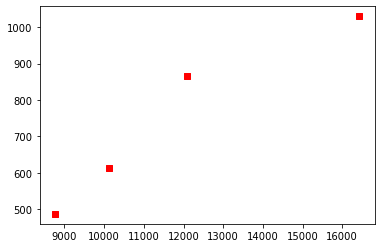

In [6]:
x_data = np.array([8759, 10132, 12078, 16430])
y_data = np.array([487, 612, 866, 1030])

plt.scatter(x_data, y_data, color = 'r', marker = 's')
plt.show()

In [20]:
w_0 = np.random.sample(5)
w_1 = np.random.sample(5)

w_0, w_1

(array([0.51802909, 0.29863879, 0.79906827, 0.78374109, 0.80868242]),
 array([0.79719005, 0.90005242, 0.87513399, 0.52662086, 0.18092745]))

In [21]:
y_hat_list = []
for w0, w1 in zip(w_0, w_1):
    y_hat_list.append(w0 + w1 * x_data)

y_hat_list

[array([ 6983.10569716,  8077.64763896,  9628.97948073, 13098.35058833]),
 array([ 7883.85779834,  9119.629773  , 10871.13178515, 14788.15992333]),
 array([ 7666.09768164,  8867.65664912, 10570.66739253, 14379.25051451]),
 array([4613.45588883, 5336.5063351 , 6361.31053644, 8653.16453655]),
 array([1585.55219267, 1833.96557771, 2186.05039002, 2973.44664035])]

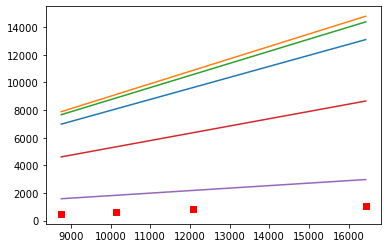

In [22]:
# 맨 위의 선에서 아래의 선으로 점점 하강하면서 최적의 w를 찾는 과정
plt.scatter(x_data, y_data, color = 'r', marker = 's')
for y_hat in y_hat_list:
    plt.plot(x_data, y_hat)

plt.show()

### Linear Regression with GD
- 임의의 $\theta_0, \theta_1$ 값으로 초기화
- Cost function $J(w_0, w_1)$이 최소화 될 때까지 학습
- 더 이상 cost function이 줄어들지 않거나 학습 횟수를 초과할 때 종료

- Gradient Descent

> $x_{new} = x_{old} - \alpha \times (2x_{old})$

> loop until convergence {do $\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0\, \theta_1)$} <br>

> ${{\partial}J\over{\partial}{w_0}} = \frac{1}{m}\sum{({{w_1}x^{(i)}}+w_0-y^{(i)})}$ <br>
> ${{\partial}J\over{\partial}{w_1}} = \frac{1}{m}\sum{({{w_1}x^{(i)}}+w_0-y^{(i)})x^{(i)}}$

- 여기서 한 번 $w$의 값을 갱신할 때, $w_0, w_1$ 을 simultaneously하게 갱신시켜 주는 것이 중요함.

- Learning rate, Iteration 횟수 등 Parameter를 지정해주어야 함
- Feature가 많으면 Normal equation에 비해 상대적으로 속도가 빠름
- 최적값에 수렴하지 않을 수도 있음
    - 그렇기 때문에 SGD를 비롯한 다른 방법을 써야 함

---

# Implementation with Numpy
- Gradient Descent로 Linear Regression 구해보기

In [24]:
import pandas as pd

- dataset from : http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

In [27]:
df = pd.read_csv('data/slr06.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [30]:
# 계산하기 편하게 하기 위해 X를 2차원 array로, y를 1차원 array로 만듦
raw_X = df['X'].values.reshape(-1,1)
y = df['Y'].values

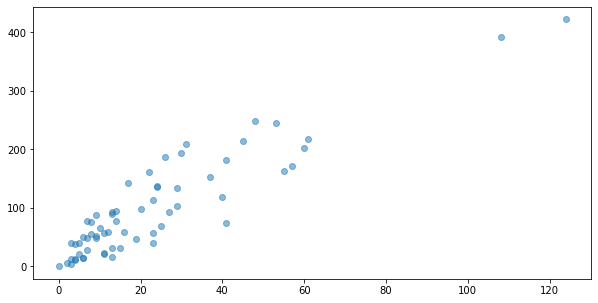

In [29]:
plt.figure(figsize = (10,5))
plt.plot(raw_X, y, 'o', alpha = 0.5)

In [35]:
# 상수항을 표현하기 위해 값이 1인 column을 X의 맨 앞에 추가
X = np.concatenate((np.ones((len(raw_X),1)), raw_X), axis = 1) # row 63개
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [46]:
# w 초기화
w = np.random.normal((2,1)) # 정규분포를 따르는 2개의 값을 추출
w

array([1.73238093, 0.96735681])

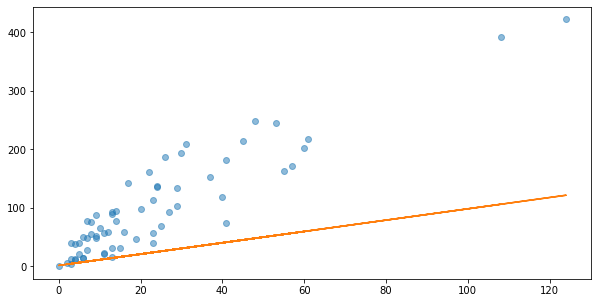

In [47]:
plt.figure(figsize = (10,5))

y_predict = np.dot(X, w) # y_hat = Xw
plt.plot(raw_X, y, 'o', alpha = 0.5)
plt.plot(raw_X, y_predict)

## Hypothesis and Cost Function

- $f(x) = h_{\theta}(x)$

In [53]:
def hypothesis_function(X, theta):
    return X.dot(theta) # y = Xw

In [54]:
hypothesis_function(X, w)[:5]

array([106.20691618,  20.11216028,  14.30801943, 121.6846251 ,
        40.42665324])

- $J(w_0, w_1) = {1\over2m}\displaystyle\sum_{i=0}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})^2}$

In [55]:
def cost_function(h, y):
    return (1/(2*len(y)) * np.sum((h-y)**2))

In [61]:
h = hypothesis_function(X, w)
print(h.shape)

cost_function(h, y)

(63,)


4991.457131371027

## Gradient Descent

In [62]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)

    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y) # X:(63,2), theta:(2,1), y:(63,)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

        if i % 10 == 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)

    return theta, theta_list, cost_list

## Do Linear Regression with GD

In [93]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta : ", theta)
print('cost : ', cost_function(hypothesis_function(X, theta), y))

theta :  [19.87848183  3.41632836]
cost :  625.3743670521221


In [94]:
theta_list[:10]

[[1.7323809300500401, 0.9673568078552216],
 [1.8066787733464174, 3.9820461854414098],
 [1.894628249307013, 3.8046424069526448],
 [1.9859029065875962, 3.8026715706468024],
 [2.0767172805174887, 3.8007106729501916],
 [2.167073692231264, 3.79875966374387],
 [2.256974451158392, 3.7968184931617786],
 [2.3464218550822604, 3.7948871115893246],
 [2.4354181901989094, 3.792965469662114],
 [2.523965731175461, 3.7910535182646896]]

In [78]:
cost_list[:5]

[4991.457131371027,
 725.3870948386897,
 708.2005287059025,
 707.3672428604789,
 706.5423400762053]

- iteration을 거듭할수록 성능이 좋아지는 것을 확인할 수 있음.
    - 직선의 우상단 기준으로 초록색 선에서 시작해서 기울기가 완만해지면서 최적의 선이 그려지게 됨 

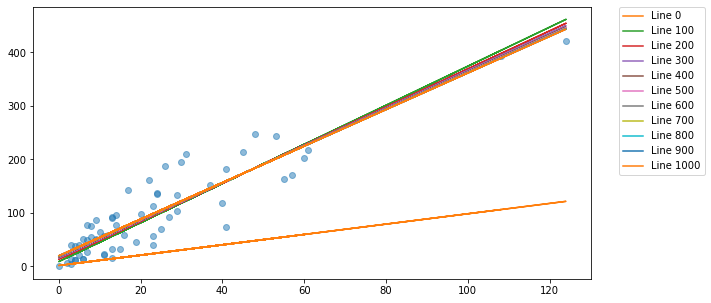

In [107]:
plt.figure(figsize = (10,5))

theta_list = np.array(theta_list)

y_predict_step = np.dot(X, theta_list.transpose())
# X : (63, 2), theta_list : (1001, 2) (= iteration의 횟수, 2)

plt.plot(raw_X, y, 'o', alpha = 0.5) 
for i in range(0, len(cost_list), 100):
    plt.plot(raw_X, y_predict_step[:,i], label = 'Line %d'%i)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

- cost도 처음에는 굉장히 컸다가 이후로는 거의 변화하지 않으면서 줄어드는 것을 확인할 수 있음.

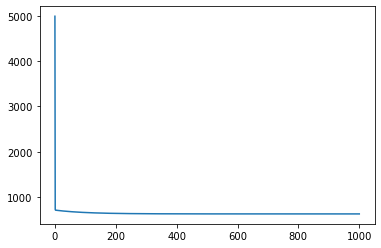

In [119]:
plt.plot(range(len(cost_list)), cost_list)

### 시각화

In [120]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)

In [121]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 7 text.Text objects>

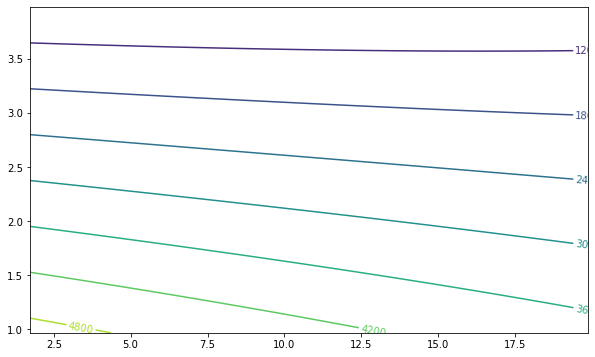

In [140]:
# 가로축이 theta0, 세로축이 theta1
plt.figure(figsize=(10,6))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [126]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

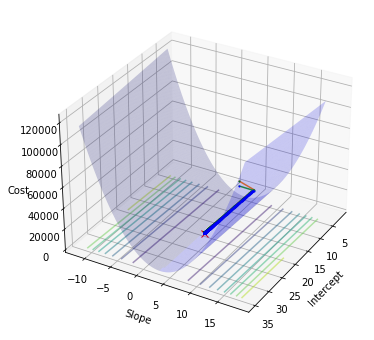

In [141]:
# intercept가 theta0, slope가 theta1

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, alpha=0.5, offset=0, stride=30)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7)

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1)
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2)